In [2]:
# 1°) Importamos las librerias a utilizar
## PYTHON ##
import pandas as pd
import numpy as np
import datetime

# Para que me muestre los datos completos y no salgan cortados
# le indico que ancho de las columnas
pd.options.display.max_colwidth = None  #con None es para todos los caracteres posibles

## VISUALIZACIONES ##
import matplotlib.pyplot as plt
import seaborn as sns

# 3° Dataset: USERS

In [3]:
# Lectura del fichero
df_users = pd.read_csv("C:/Users/Santiago/Desktop/EDA/users.csv")
df_users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [5]:
# Cantidad de filas y columnas
print(f'df_flights contiene --> filas:{df_users.shape[0]} y columnas:{df_users.shape[1]}')

df_flights contiene --> filas:1340 y columnas:5


In [6]:
# Analisis estadistico de las variables
df_users.describe(include="all")

,code,company,name,gender,age
count,1340.000000,1340,1340,1340,1340.000000
unique,NaN,5,1338,3,NaN
top,NaN,4You,Charlotte Johnson,male,NaN
freq,NaN,453,2,452,NaN
mean,669.500000,NaN,NaN,NaN,42.742537
std,386.968991,NaN,NaN,NaN,12.869779
min,0.000000,NaN,NaN,NaN,21.000000
25%,334.750000,NaN,NaN,NaN,32.000000
50%,669.500000,NaN,NaN,NaN,42.000000
75%,1004.250000,NaN,NaN,NaN,54.000000


Descripción de las variables:
* **code** (v.numérica): userCode es unico para cada cliente
* **company** (v.categórica): 5 tipos de companias de viaje
* **name**:
* **gender** (v.categórica): notamos que hay 3 tipos de sexo, lo cual indica que hay algun error que analizar
* **age** (v.numérica): el min es 21 y el max es 65, el rango es coherente

In [7]:
df_users['code'].unique().size

1340

Observaciones: cada userCode es unico e indica que hay 1340 clientes

C:\Users\Santiago\AppData\Local\Temp\ipykernel_4368\172591438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_users.corr(), annot=True)


<AxesSubplot: >

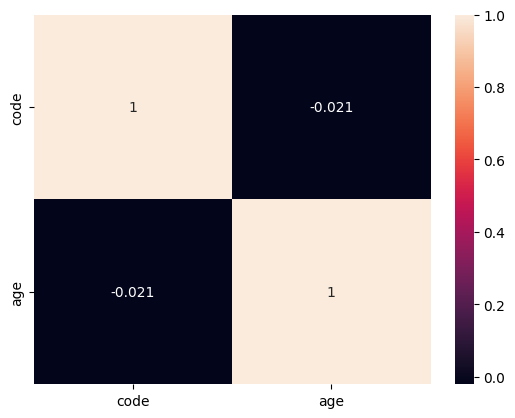

In [8]:
# Heatmap/Mapa de Correlación
sns.heatmap(df_users.corr(), annot=True)

Observaciones:

### 3. Data Cleaning

**Missings/Valores nulos**

In [9]:
df_users.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [10]:
df_users.isna().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [11]:
df_users.gender.unique()

array(['male', 'female', 'none'], dtype=object)

In [12]:
# Analizamos los % de gender para realizar inputaciones o eliminar registros 
gender = pd.DataFrame(df_users.groupby('gender').size(),columns=['cantidad']).sort_values(by="cantidad",ascending=False)
gender['%']=round(452*100/1340,2),round(448*100/1340,2),round(440*100/1340,2)
gender

,cantidad,%
gender,,
male,452,33.73
female,448,33.43
none,440,32.84


Observaciones: El 33% tiene valor none (bajo porcentaje para ser eliminado). Como el % de male y female es casi el mismo, inputamos los valores none equitativamente a male y female

In [13]:
# Inputamos los valores none a male y female
df_users['gender'] = df_users['gender'].replace(to_replace='none', value=['male','female'],method='bfill')

In [14]:
# Corroboramos que la inputacion se realizo correctamente
df_users.gender.value_counts()

female    687
male      653
Name: gender, dtype: int64